In [1]:
import cantera as ct
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
p=ct.one_atm
Tin=300.0
phi=[1.0]
# phi=[0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8]
fuel='CH4:1'

In [3]:
loglevel = 1
Sl = []

# Simulation loop over equivalence ratios
for i in range(len(phi)):
    gas = ct.Solution('gri30.yaml')
    gas.set_equivalence_ratio(phi[i], fuel, 'O2:1,N2:3.76')
    f = ct.FreeFlame(gas, width=0.02)
    f.set_refine_criteria(ratio=3, slope=0.06, curve=0.12)

    # Set transport model to mixture-averaged and solve
    f.transport_model = 'mixture-averaged'
    f.solve(loglevel=loglevel, auto=True)

    # Save mixture-averaged solution, allow overwriting
    file_name = f'adiabatic_flame_{phi[i]:0.2f}.yaml'
    f.save(file_name, 'mix', description='solution with mixture-averaged transport', overwrite=True)
    f.show_solution()

    # Change transport model to multicomponent ('Multi') and solve
    f.transport_model = 'Multi'
    f.solve(loglevel=loglevel, auto=True)
    f.show_solution()

    # Save multicomponent solution, allow overwriting
    file_name = f'adiabatic_flame_{phi[i]:0.2f}.yaml'
    f.save(file_name, 'multi', description='solution with multicomponent transport', overwrite=True)

    # Prepare data for formatted output
    mixfrac = np.linspace(0, 1, len(f.grid))  # Mixture fraction as a linear distribution (replace with actual if available)
    source_pv = f.net_production_rates[gas.species_index('CO2')] + f.net_production_rates[gas.species_index('H2O')]  # Sample source term

    # Create formatted output file
    output_file = f'post_adiabatic_flame_{phi[i]:0.2f}.dat'
    with open(output_file, 'w') as file:
        # Write the header
        file.write("FLAMELET GENERATED MANIFOLD\n\n")
        file.write("[NUMBER_FLAMELETS]\n   1\n")
        file.write("[NUMBER_PV]\n 201\n")
        file.write("[NUMBER_VARIABLES]\n 116\n\n")
        file.write("[DATA]\n")

        # Write column headers
        headers = (
            "Mixfrac PV H2 H O O2 OH H2O HO2 H2O2 C CH CH2 CH2(S) CH3 CH4 CO CO2 HCO CH2O CH2OH CH3O "
            "CH3OH C2H C2H2 C2H3 C2H4 C2H5 C2H6 HCCO CH2CO HCCOH N NH NH2 NH3 NNH NO NO2 N2O HNO CN HCN "
            "H2CN HCNN HCNO HOCN HNCO NCO N2 AR C3H7 C3H8 CH2CHO CH3CHO SourcePV SourceH2 SourceH SourceO "
            "SourceO2 SourceOH SourceH2O SourceHO2 SourceH2O2 SourceC SourceCH SourceCH2 SourceCH2(S) "
            "SourceCH3 SourceCH4 SourceCO SourceCO2 SourceHCO SourceCH2O SourceCH2OH SourceCH3O SourceCH3OH "
            "SourceC2H SourceC2H2 SourceC2H3 SourceC2H4 SourceC2H5 SourceC2H6 SourceHCCO SourceCH2CO SourceHCCOH "
            "SourceN SourceNH SourceNH2 SourceNH3 SourceNNH SourceNO SourceNO2 SourceN2O SourceHNO SourceCN "
            "SourceHCN SourceH2CN SourceHCNN SourceHCNO SourceHOCN SourceHNCO SourceNCO SourceN2 SourceAR "
            "SourceC3H7 SourceC3H8 SourceCH2CHO SourceCH3CHO Temperature Density Cp Viscosity AlphaPV OmegaPV rhoDf\n"
        )
        file.write(headers)

        # Write data rows
        for j in range(len(f.grid)):
            species_data = " ".join(f"{f.Y[gas.species_index(species)][j]:.14e}" for species in gas.species_names)
            source_data = " ".join(f"{source_pv[j]:.14e}" for _ in range(62))  # Placeholder for all source terms
            additional_data = f"{f.T[j]:.14e} {f.density[j]:.14e} {f.cp[j]:.14e} {f.viscosity[j]:.14e} 0.0 0.0 0.0"
            file.write(f"{mixfrac[j]:.14e}\t{f.T[j]:.14e}\t{species_data}\t{source_data}\t{additional_data}\n")

    Sl.append(f.velocity[0])


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.136e-05      5.195
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0005474      4.219
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.871e-05      5.938
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.312e-05      5.928
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0008887      4.291
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accommodate flame thickness. New width: 0.04 m
##############################################################################
Refining grid in flame.
    New points inserted after grid

C:\Users\ERTG\anaconda3\Lib\site-packages\cantera\onedim.py:231: DeprecationWarning: FactoryBase::canonicalize: Model name 'Multi' is deprecated. Use 'multicomponent' instead.
  self.flame.transport_model = model


    failure. 
Take 10 timesteps     1.068e-05      6.278
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.802e-05      6.666
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      1.52e-05      6.748
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.924e-05      6.744
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.624e-05      6.771
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.827e-05      6.744
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.055e-05      6.699
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     3.468e-05      6.492
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.778e-05      5.706
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0

[1.0]
[0.38215340834837397]


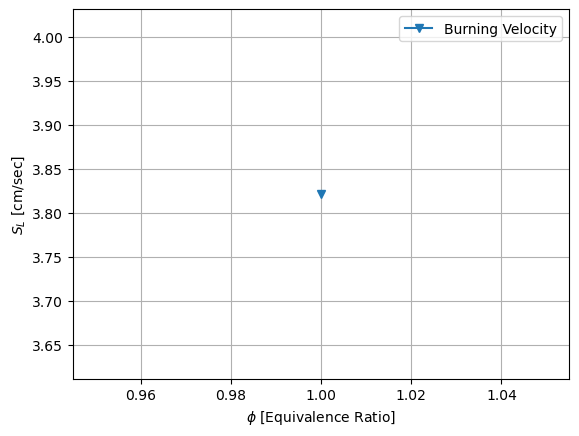

In [4]:
# Plotting the results
print(phi)
print(Sl)

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.plot(phi, np.array(Sl) * 10, marker='v', label='Burning Velocity')
ax1.legend(loc=0)
ax1.set_xlabel(r'$\phi$ [Equivalence Ratio]')
ax1.set_ylabel(r'$S_L$ [cm/sec]')
ax1.grid(True)
plt.show()

In [5]:
# Restore solution from file
data_directory = os.getcwd()
file_name = 'adiabatic_flame_1.00.yaml'
f.restore(filename=os.path.join(data_directory, file_name), name='mix', loglevel=0)

# Process reaction rates and other properties...
T_var1 = f.T
source_H2=f.net_production_rates[gas.species_index('H2')]*\
          gas.molecular_weights[gas.species_index('H2')]
source_H=f.net_production_rates[gas.species_index('H')]*\
          gas.molecular_weights[gas.species_index('H')]
source_O=f.net_production_rates[gas.species_index('O')]*\
          gas.molecular_weights[gas.species_index('O')]
source_O2=f.net_production_rates[gas.species_index('O2')]*\
          gas.molecular_weights[gas.species_index('O2')]
source_OH=f.net_production_rates[gas.species_index('OH')]*\
          gas.molecular_weights[gas.species_index('OH')]
source_H2O=f.net_production_rates[gas.species_index('H2O')]*\
          gas.molecular_weights[gas.species_index('H2O')]
source_HO2=f.net_production_rates[gas.species_index('HO2')]*\
          gas.molecular_weights[gas.species_index('HO2')]
source_H2O2=f.net_production_rates[gas.species_index('H2O2')]*\
          gas.molecular_weights[gas.species_index('H2O2')]
source_C=f.net_production_rates[gas.species_index('C')]*\
          gas.molecular_weights[gas.species_index('C')]
source_CH=f.net_production_rates[gas.species_index('CH')]*\
          gas.molecular_weights[gas.species_index('CH')]
source_CH2=f.net_production_rates[gas.species_index('CH2')]*\
          gas.molecular_weights[gas.species_index('CH2')]
source_CH2S=f.net_production_rates[gas.species_index('CH2(S)')]*\
          gas.molecular_weights[gas.species_index('CH2(S)')]
source_CH3=f.net_production_rates[gas.species_index('CH3')]*\
          gas.molecular_weights[gas.species_index('CH3')]
source_CH4=f.net_production_rates[gas.species_index('CH4')]*\
          gas.molecular_weights[gas.species_index('CH4')]
source_CO=f.net_production_rates[gas.species_index('CO')]*\
          gas.molecular_weights[gas.species_index('CO')]
source_CO2=f.net_production_rates[gas.species_index('CO2')]*\
          gas.molecular_weights[gas.species_index('CO2')]
source_HCO=f.net_production_rates[gas.species_index('HCO')]*\
           gas.molecular_weights[gas.species_index('HCO')]
source_CH2O=f.net_production_rates[gas.species_index('CH2O')]*\
           gas.molecular_weights[gas.species_index('CH2O')]
source_CH2OH=f.net_production_rates[gas.species_index('CH2OH')]*\
          gas.molecular_weights[gas.species_index('CH2OH')]
source_CH3O=f.net_production_rates[gas.species_index('CH3O')]*\
          gas.molecular_weights[gas.species_index('CH3O')]
source_CH3OH=f.net_production_rates[gas.species_index('CH3OH')]*\
          gas.molecular_weights[gas.species_index('CH3OH')]
source_C2H=f.net_production_rates[gas.species_index('C2H')]*\
          gas.molecular_weights[gas.species_index('C2H')]
source_C2H2=f.net_production_rates[gas.species_index('C2H2')]*\
          gas.molecular_weights[gas.species_index('C2H2')]
source_C2H3=f.net_production_rates[gas.species_index('C2H3')]*\
          gas.molecular_weights[gas.species_index('C2H3')]
source_C2H4=f.net_production_rates[gas.species_index('C2H4')]*\
          gas.molecular_weights[gas.species_index('C2H4')]
source_C2H5=f.net_production_rates[gas.species_index('C2H5')]*\
          gas.molecular_weights[gas.species_index('C2H5')]
source_C2H6=f.net_production_rates[gas.species_index('C2H6')]*\
          gas.molecular_weights[gas.species_index('C2H6')]
source_HCCO=f.net_production_rates[gas.species_index('HCCO')]*\
          gas.molecular_weights[gas.species_index('HCCO')]
source_CH2CO=f.net_production_rates[gas.species_index('CH2CO')]*\
          gas.molecular_weights[gas.species_index('CH2CO')]
source_HCCOH=f.net_production_rates[gas.species_index('HCCOH')]*\
          gas.molecular_weights[gas.species_index('HCCOH')]
source_N=f.net_production_rates[gas.species_index('N')]*\
          gas.molecular_weights[gas.species_index('N')]
source_NH=f.net_production_rates[gas.species_index('NH')]*\
          gas.molecular_weights[gas.species_index('NH')]
source_NH2=f.net_production_rates[gas.species_index('NH2')]*\
          gas.molecular_weights[gas.species_index('NH2')]
source_NH3=f.net_production_rates[gas.species_index('NH3')]*\
          gas.molecular_weights[gas.species_index('NH3')]
source_NNH=f.net_production_rates[gas.species_index('NNH')]*\
          gas.molecular_weights[gas.species_index('NNH')]
source_NO=f.net_production_rates[gas.species_index('NO')]*\
          gas.molecular_weights[gas.species_index('NO')]
source_NO2=f.net_production_rates[gas.species_index('NO2')]*\
          gas.molecular_weights[gas.species_index('NO2')]
source_N2O=f.net_production_rates[gas.species_index('N2O')]*\
          gas.molecular_weights[gas.species_index('N2O')]
source_HNO=f.net_production_rates[gas.species_index('HNO')]*\
          gas.molecular_weights[gas.species_index('HNO')]
source_HCN=f.net_production_rates[gas.species_index('HCN')]*\
          gas.molecular_weights[gas.species_index('HCN')]
source_H2CN=f.net_production_rates[gas.species_index('H2CN')]*\
          gas.molecular_weights[gas.species_index('H2CN')]
source_CN=f.net_production_rates[gas.species_index('CN')]*\
          gas.molecular_weights[gas.species_index('CN')]
source_HCNN=f.net_production_rates[gas.species_index('HCNN')]*\
          gas.molecular_weights[gas.species_index('HCNN')]
source_HCNO=f.net_production_rates[gas.species_index('HCNO')]*\
          gas.molecular_weights[gas.species_index('HCNO')]
source_HOCN=f.net_production_rates[gas.species_index('HOCN')]*\
          gas.molecular_weights[gas.species_index('HOCN')]
source_HNCO=f.net_production_rates[gas.species_index('HNCO')]*\
          gas.molecular_weights[gas.species_index('HNCO')]
source_NCO=f.net_production_rates[gas.species_index('NCO')]*\
          gas.molecular_weights[gas.species_index('NCO')]
source_N2=f.net_production_rates[gas.species_index('N2')]*\
          gas.molecular_weights[gas.species_index('N2')]
source_AR=f.net_production_rates[gas.species_index('AR')]*\
          gas.molecular_weights[gas.species_index('AR')]
source_C3H7=f.net_production_rates[gas.species_index('C3H7')]*\
          gas.molecular_weights[gas.species_index('C3H7')]
source_C3H8=f.net_production_rates[gas.species_index('C3H8')]*\
          gas.molecular_weights[gas.species_index('C3H8')]
source_CH2CHO=f.net_production_rates[gas.species_index('CH2CHO')]*\
          gas.molecular_weights[gas.species_index('CH2CHO')]
source_CH3CHO=f.net_production_rates[gas.species_index('CH3CHO')]*\
          gas.molecular_weights[gas.species_index('CH3CHO')]
source_pv=f.net_production_rates[gas.species_index('CO2')]+\
          f.net_production_rates[gas.species_index('H2O')]+\
          f.net_production_rates[gas.species_index('H2')]+\
          f.net_production_rates[gas.species_index('CO')]

C:\Users\ERTG\AppData\Local\Temp\ipykernel_28348\3891356297.py:4: DeprecationWarning: Sim1D.restore: Argument 'loglevel' is deprecated and will be ignored.
  f.restore(filename=os.path.join(data_directory, file_name), name='mix', loglevel=0)


In [6]:
# c is the Progress Variable
dimensions = np.shape(f.Y)
rows, columns = dimensions
c=np.zeros(columns)
cv=np.zeros(columns)
print('number of rows=',np.shape(c)) 
x=['H2O','CO2','H2','CO']
y=[1.0,1.0,1.0,1.0]
#print(f.Y)
# for i in range(0,len(f.Y[0,:])):
#     for j in x:
#       cv+=1.0*f.Y[gas.species_index(j)]/gas.molecular_weights[gas.species_index(j)]
#     print('raw Progress Variable=',cv) 
#     c.append(cv)
#c=1.0*f.Y[gas.species_index('CO2')]/gas.molecular_weights[gas.species_index('CO2')]
#print('raw Progress Variable=',c) 


for j in x:
  cv=1.0*f.Y[gas.species_index(j)]/gas.molecular_weights[gas.species_index(j)]
  c=np.add(c,cv)  
#print('raw Progress Variable=',cv) 
#     c.append(cv)
 
# print("length of c=",len(c))
print('Progress Variable=',c)

number of rows= (193,)
Progress Variable= [1.39514328e-11 2.86112005e-10 5.86736900e-09 4.94877736e-08
 2.30869864e-07 1.29729003e-06 3.78396994e-06 7.31197537e-06
 1.51940046e-05 2.28411469e-05 3.54324028e-05 5.65691825e-05
 7.29851970e-05 9.61283487e-05 1.29794424e-04 1.80572523e-04
 2.16971687e-04 2.64684225e-04 3.27791511e-04 3.67508116e-04
 4.13992986e-04 4.68345083e-04 5.31748645e-04 6.05443087e-04
 6.90683363e-04 7.38643362e-04 7.90230454e-04 8.45615428e-04
 9.04961032e-04 9.68420509e-04 1.03613640e-03 1.10823961e-03
 1.18484884e-03 1.26607027e-03 1.35199755e-03 1.44271201e-03
 1.49029334e-03 1.53915320e-03 1.58929960e-03 1.64073987e-03
 1.69348051e-03 1.74752741e-03 1.80288569e-03 1.85955985e-03
 1.91755369e-03 1.97687046e-03 2.09835786e-03 2.22493120e-03
 2.35659274e-03 2.49333755e-03 2.63515385e-03 2.78202338e-03
 2.93392148e-03 3.09081709e-03 3.17185484e-03 3.25417669e-03
 3.33777653e-03 3.42264768e-03 3.50878283e-03 3.59617396e-03
 3.68481230e-03 3.77468820e-03 3.86579108e-

In [7]:
print("******************")
# New Progress Variable                                    
pv=np.linspace(0.0,1.0,201) 
Y_new=[]
Y=np.array(f.Y)
#print('regular Progress Variable=',pv)
#print('raw Progress Variable=',c)
#np.shape(pv)
np.shape(Y)
#len(f.Y[0,:])
range(len(f.Y))
for i in range(len(f.Y)):
    Y_new.append(np.interp(pv, c, Y[i]))
#    print('Progress Variable=',Y_new)
for i, Y_new in enumerate(Y_new):
    print(f"Interpolated values for row {i + 1}:", Y_new)
    print(Y_new.shape)

******************
Interpolated values for row 1: [2.81259667e-11 1.26945680e-03 8.24978008e-04 2.64879277e-04
 2.64879277e-04 2.64879277e-04 2.64879277e-04 2.64879277e-04
 2.64879277e-04 2.64879277e-04 2.64879277e-04 2.64879277e-04
 2.64879277e-04 2.64879277e-04 2.64879277e-04 2.64879277e-04
 2.64879277e-04 2.64879277e-04 2.64879277e-04 2.64879277e-04
 2.64879277e-04 2.64879277e-04 2.64879277e-04 2.64879277e-04
 2.64879277e-04 2.64879277e-04 2.64879277e-04 2.64879277e-04
 2.64879277e-04 2.64879277e-04 2.64879277e-04 2.64879277e-04
 2.64879277e-04 2.64879277e-04 2.64879277e-04 2.64879277e-04
 2.64879277e-04 2.64879277e-04 2.64879277e-04 2.64879277e-04
 2.64879277e-04 2.64879277e-04 2.64879277e-04 2.64879277e-04
 2.64879277e-04 2.64879277e-04 2.64879277e-04 2.64879277e-04
 2.64879277e-04 2.64879277e-04 2.64879277e-04 2.64879277e-04
 2.64879277e-04 2.64879277e-04 2.64879277e-04 2.64879277e-04
 2.64879277e-04 2.64879277e-04 2.64879277e-04 2.64879277e-04
 2.64879277e-04 2.64879277e-04 2.64

In [8]:
#    converted Y_new as list data type to Numpy array
gas.basis = 'molar'
density_molar = (f.density)
gas.basis = 'mass'
density_mass = (f.density)
source_new_H2=np.interp(pv,c,source_H2)
source_new_H=np.interp(pv,c,source_H)
source_new_O=np.interp(pv,c,source_O)
source_new_O2=np.interp(pv,c,source_O2)
source_new_OH=np.interp(pv,c,source_OH)
source_new_H2O=np.interp(pv,c,source_H2O)
source_new_HO2=np.interp(pv,c,source_HO2)
source_new_H2O2=np.interp(pv,c,source_H2O2)
source_new_C=np.interp(pv,c,source_C)
source_new_CH=np.interp(pv,c,source_CH)
source_new_CH2=np.interp(pv,c,source_CH2)
source_new_CH2S=np.interp(pv,c,source_CH2S)
source_new_CH3=np.interp(pv,c,source_CH3)
source_new_CH4=np.interp(pv,c,source_CH4)
source_new_CO=np.interp(pv,c,source_CO)
source_new_CO2=np.interp(pv,c,source_CO2)
source_new_HCO=np.interp(pv,c,source_HCO)
source_new_CH2O=np.interp(pv,c,source_CH2O)
source_new_CH2OH=np.interp(pv,c,source_CH2OH)
source_new_CH3O=np.interp(pv,c,source_CH3O)
source_new_CH3OH=np.interp(pv,c,source_CH3OH)
source_new_C2H=np.interp(pv,c,source_C2H)
source_new_C2H2=np.interp(pv,c,source_C2H2)
source_new_C2H3=np.interp(pv,c,source_C2H3)
source_new_C2H4=np.interp(pv,c,source_C2H4)
source_new_C2H5=np.interp(pv,c,source_C2H5)
source_new_C2H6=np.interp(pv,c,source_C2H6)
source_new_HCCO=np.interp(pv,c,source_HCCO)
source_new_HCCOH=np.interp(pv,c,source_HCCOH)
source_new_N=np.interp(pv,c,source_N)
source_new_NH=np.interp(pv,c,source_NH)
source_new_NH2=np.interp(pv,c,source_NH2)
source_new_NH3=np.interp(pv,c,source_NH3)
source_new_NNH=np.interp(pv,c,source_NNH)
source_new_NO=np.interp(pv,c,source_NO)
source_new_NO2=np.interp(pv,c,source_NO2)
source_new_N2O=np.interp(pv,c,source_N2O)
source_new_HNO=np.interp(pv,c,source_HNO)
source_new_CN=np.interp(pv,c,source_CN)
source_new_HCN=np.interp(pv,c,source_HCN)
source_new_H2CN=np.interp(pv,c,source_H2CN)
source_new_HCNN=np.interp(pv,c,source_HCNN)
source_new_HCNO=np.interp(pv,c,source_HCNO)
source_new_HOCN=np.interp(pv,c,source_HOCN)
source_new_HNCO=np.interp(pv,c,source_HNCO)
source_new_NCO=np.interp(pv,c,source_NCO)
source_new_N2=np.interp(pv,c,source_N2)
source_new_AR=np.interp(pv,c,source_AR)
source_new_C3H7=np.interp(pv,c,source_C3H7)
source_new_C3H8=np.interp(pv,c,source_C3H8)
source_new_CH2CHO=np.interp(pv,c,source_CH2CHO)
source_new_CH3CHO=np.interp(pv,c,source_CH3CHO)
source_new_pv=np.interp(pv,c,source_pv)
T_new=np.interp(pv,c,T_var1)
cp_new=np.interp(pv,c,f.cp)
visco_new=np.interp(pv,c,f.viscosity)
V_new=np.interp(pv,c,f.velocity)
therm_cond=np.interp(pv,c,f.thermal_conductivity)
density_molar_new=np.interp(pv,c,density_molar)
density_mass_new=np.interp(pv,c,density_mass)
h_new=np.interp(pv,c,f.h)
heat_release_rate_new=np.interp(pv,c,f.heat_release_rate)

pr1=np.multiply(f.viscosity,f.cp)

pr=np.divide(pr1,f.thermal_conductivity)
print('prandtl numerator=',pr)
prandtlNo=np.interp(pv,c,pr)

# alpha=therm_cond/(density_mass*cp_new)
molar_mass=density_mass/density_molar

print("Preparing Data")
data1=np.transpose([\
pv])
data2=np.transpose([
source_new_pv,\
source_new_H2,\
source_new_H,\
source_new_O,\
source_new_O2,\
source_new_OH,\
source_new_H2O,\
source_new_HO2,\
source_new_H2O2,\
source_new_C,\
source_new_CH,\
source_new_CH2,\
source_new_CH2S,\
source_new_CH3,\
source_new_CH4,\
source_new_CO,\
source_new_CO2,\
source_new_HCO,\
source_new_CH2O,\
source_new_CH2OH,\
source_new_CH3O,\
source_new_CH3OH,\
source_new_C2H,\
source_new_C2H2,\
source_new_C2H3,\
source_new_C2H4,\
source_new_C2H5,\
source_new_C2H6,\
source_new_HCCO,\
source_new_HCCOH,\
source_new_N,\
source_new_NH,\
source_new_NH2,\
source_new_NH3,\
source_new_NNH,\
source_new_NO,\
source_new_NO2,\
source_new_N2O,\
source_new_HNO,\
source_new_CN,\
source_new_HCN,\
source_new_H2CN,\
source_new_HCNN,\
source_new_HCNO,\
source_new_HOCN,\
source_new_HNCO,\
source_new_NCO,\
source_new_N2,\
source_new_AR,\
source_new_C3H7,\
source_new_C3H8,\
source_new_CH2CHO,\
source_new_CH3CHO,\
T_new,\
cp_new,\
visco_new,\
V_new,\
therm_cond,\
density_molar_new,\
density_mass_new,\
h_new,\
heat_release_rate_new,\
prandtlNo,\
# alpha,\
])
Yfinal= Y_new.transpose()
# Concatenation of data 1, all 53 species and data 2
data=np.c_[data1,Yfinal,data2]
print('Writing data...')
filename = 'post_' + 'FGM' + '.dat'
try:
    os.remove(filename)
except OSError:
    pass
header = "**********************************************************\n"
header += "1D Premixed Adiabatic flame\n"
header += "Reactants:" + 'CH4:1,O2:2,N2:7.52'  + "\n"
header += "p " + str(f.P) + " Pa" + "\n"
header += "T_in_reactants" + str(Tin) + "K" + "\n"
header += "FLAMELET GENERATED MANIFOLD"+"\n"
header += "[NUMBER_FLAMELETS]"+"\n"
header +=  "1" + "\n"
header += "[Number_PV]"+"\n"
header +=  "201" + "\n"
header += "[NUMBER_VARIABLES]"+"\n"
header +=  "116" + "\n"
header += "[DATA]"+"\n"
# header += "**********************************************************\n"
header += '''pv H2  H  O  O2  OH  H2O  HO2  H2O2  C  CH  CH2  CH2(S)  CH3  CH4  CO  CO2  HCO  CH2O  CH2OH  CH3O  CH3OH  C2H  C2H2  C2H3  C2H4  C2H5  C2H6  HCCO  CH2CO  HCCOH  N  NH  NH2  NH3  NNH  NO  NO2  N2O  HNO  CN  HCN  H2CN  HCNN  HCNO  HOCN  HNCO  NCO  N2  AR  C3H7  C3H8  CH2CHO  CH3CHO  source_pv  source_H2 source_H source_O source_O2 source_OH source_H2O source_HO2 source_H2O2 source_C source_CH source_CH2 source_CH2(S)source_CH3 source_CH4 source_CO source_CO2 source_HCO source_CH2O source_CH2OH source_CH3O source_CH3OH source_C2H source_C2H2 source_C2H3 source_C2H5 source_C2H6 source_HCCO source_CH2CO source_NH source_NH2 source_NH3 source_NNH source_NO source_NO2 source_N2O source_HNO source_CN source_HCN source_H2CN source_HCNN source_HCNO source_HOCN source_HNCO source_NCO source_AR source_C3H8 source_CH2CHO source_CH3CHO Temperature Density Cp Viscosity k  molar_density  mass_density  H  HRR  Prandtl'''
np.savetxt(filename,data,fmt="%.14e",delimiter='\t ', newline='\n', header=header)





prandtl numerator= [0.71220022 0.7122002  0.71219993 0.71219781 0.712189   0.71213725
 0.71201686 0.71184703 0.71147222 0.7111172  0.71055577 0.70968252
 0.70907958 0.70834752 0.70749661 0.70657174 0.70611569 0.70569023
 0.7052932  0.70509505 0.70488607 0.70464658 0.7043501  0.7039651
 0.7034592  0.70314853 0.70279788 0.70240582 0.7019724  0.7014994
 0.70099049 0.70045129 0.69988937 0.69931401 0.69873598 0.69816715
 0.69788833 0.69761646 0.69735312 0.69709992 0.69685841 0.69663009
 0.69641638 0.69621863 0.69603808 0.69587588 0.69561441 0.69543657
 0.69534602 0.69534358 0.69542707 0.69559099 0.69582636 0.69612044
 0.69628187 0.69645129 0.69662588 0.69680251 0.6969777  0.69714764
 0.69730812 0.69745452 0.69758182 0.69768452 0.6977978  0.69773464
 0.69730142 0.69672925 0.69609692 0.69575459 0.69539688 0.69502376
 0.69463526 0.69423142 0.69381235 0.69337819 0.69292914 0.69246547
 0.69198751 0.69149566 0.6909904  0.69047229 0.68994196 0.68940016
 0.6888477  0.68828547 0.68771449 0.68713581 

In [9]:
len(f.Y)

53